# Data exploration

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

In [3]:
joint_data = pd.read_csv('joint_data.csv') # note to correct spelling of 'joint' at some point

In [4]:
pd.set_option("display.max_rows", 100, "display.max_columns", None)

joint_data

,Unnamed: 0,poi_lat_lgt,waypoint_longitude,route_id,waypoint_latitude,num_of_waypoint,poi_longitude,poi_latitude,poi_name,Unnamed: 0.1,poi_category,route_linestring
0,0,POINT (13.6774745 52.4385208),13.67734,113043,52.43849,133,13.677475,52.438521,Müggeleck,212802,viewpoint,"LINESTRING (13.69072 52.45147, 13.69075 52.451..."
1,1,POINT (13.6279051 52.444312),13.62759,113043,52.44386,282,13.627905,52.444312,NaN,9236,bench,"LINESTRING (13.69072 52.45147, 13.69075 52.451..."
2,2,POINT (13.6271595 52.4444457),13.62704,113043,52.44442,288,13.627159,52.444446,NaN,9239,bench,"LINESTRING (13.69072 52.45147, 13.69075 52.451..."
3,3,POINT (13.6269487 52.4444808),13.62704,113043,52.44442,288,13.626949,52.444481,NaN,9240,bench,"LINESTRING (13.69072 52.45147, 13.69075 52.451..."
4,4,POINT (13.6273851 52.4453161),13.62716,113043,52.44509,292,13.627385,52.445316,NaN,9245,bench,"LINESTRING (13.69072 52.45147, 13.69075 52.451..."
...,...,...,...,...,...,...,...,...,...,...,...,...
91099,91099,POINT (13.2834619 52.5895611),13.28369,3674009,52.58943,388,13.283462,52.589561,NaN,121511,tree,"LINESTRING (13.21284 52.53883, 13.21286 52.538..."
91100,91100,POINT (13.2843859 52.5890324),13.28369,3674009,52.58943,388,13.284386,52.589032,NaN,203908,tree,"LINESTRING (13.21284 52.53883, 13.21286 52.538..."
91101,91101,POINT (13.2844894 52.5889504),13.28369,3674009,52.58943,388,13.284489,52.588950,NaN,203909,tree,"LINESTRING (13.21284 52.53883, 13.21286 52.538..."
91102,91102,POINT (13.191308 52.451652),13.19110,3674128,52.45177,281,13.191308,52.451652,NaN,56374,tree,"LINESTRING (13.26176 52.4888, 13.2618 52.48877..."


Creating a subset which gives the number of POIs per route

In [5]:
poi_per_route = joint_data.groupby( ["route_id"] ).size().to_frame(name = 'poi_count').reset_index()
poi_per_route.sort_values(by='poi_count', ascending=False, inplace=True)
poi_per_route

,route_id,poi_count
277,3547573,3171
74,2379991,2597
412,3670488,2355
203,3470257,1924
294,3562051,1764
...,...,...
160,3282494,1
316,3577335,1
152,3193639,1
428,3674128,1


In [61]:
poi_per_route.poi_count.describe()

count     430.000000
mean      211.869767
std       369.018893
min         1.000000
25%        14.000000
50%        62.000000
75%       256.250000
max      3171.000000
Name: poi_count, dtype: float64

The **mean** number of POI per route is 211, however the **median** is 62, meaning the routes are heavily **skewed**. There seem to be outliers on both ends, however, since the smallest number of poi = 1 

#### Plotting the number of POI per route

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 144x144 with 0 Axes>

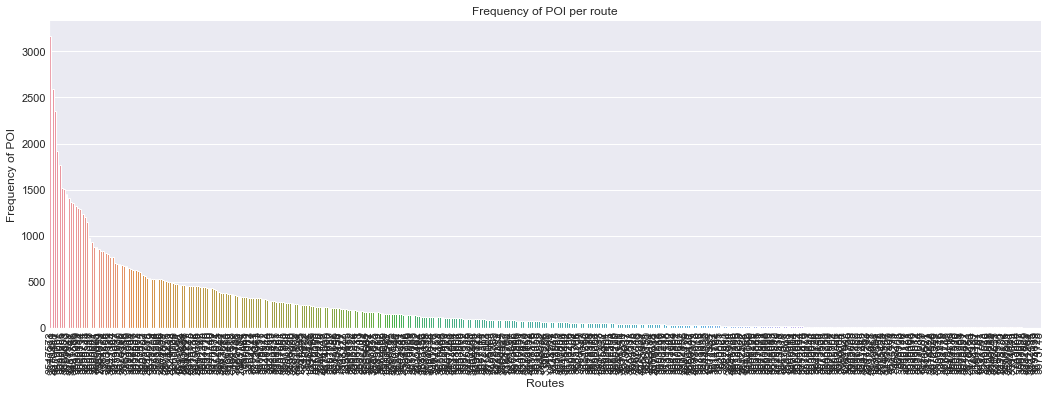

In [110]:
plt.figure()
ax = sns.catplot(data=poi_per_route, x="route_id",
                 y="poi_count", kind="bar",
                 order = poi_per_route.sort_values(by='poi_count', ascending=False).route_id, 
                  
                 aspect=3)

locs, labels = plt.xticks()
ax.set(title = "Frequency of POI per route",
       xlabel = "Routes",
       ylabel = "Frequency of POI")
plt.setp(labels, rotation=90)

plt.show

### Creating an overview of the spread of categories

In [6]:
category_counts = joint_data.groupby( ["poi_category"] ).size().to_frame(name = 'category_count').reset_index()
category_counts = category_counts.sort_values(by='category_count', ascending = False)

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 144x144 with 0 Axes>

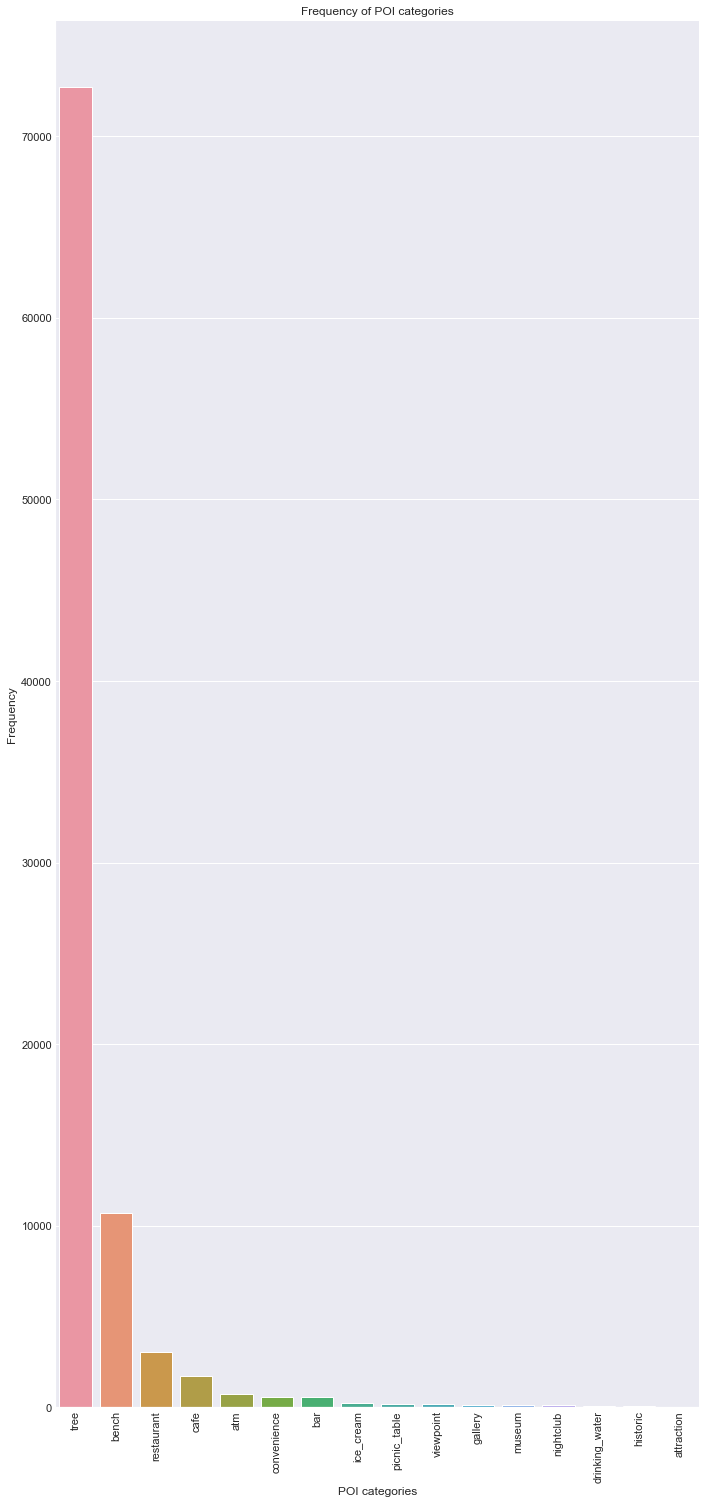

In [112]:
plt.figure()
ax = sns.catplot(data=category_counts, x="poi_category", y="category_count", kind="bar", height=20, aspect=0.5)
locs, labels = plt.xticks()
ax.set(title = "Frequency of POI categories",
       xlabel = "POI categories",
       ylabel = "Frequency")
plt.setp(labels, rotation=90)

plt.show

## Plotting number of POI against number of Waypoints

First, we need to read in the full routes dataset and ascertain the number of waypoints per group

In [9]:
routes = pd.read_csv('cleaned_all_routes_data_long.csv')

In [10]:
routes.head()

,Unnamed: 0,route_id,num_of_waypoint,lat_lgt,latitude,longitude
0,10726,1005019,0,"('52.50607', '13.33208')",52.50607,13.33208
1,10727,1005019,1,"('52.50553', '13.33163')",52.50553,13.33163
2,10728,1005019,2,"('52.50525', '13.33148')",52.50525,13.33148
3,10729,1005019,3,"('52.50515', '13.33337')",52.50515,13.33337
4,10730,1005019,4,"('52.5052', '13.33366')",52.50520,13.33366


#### Creating a new subset of route_id and number of waypoints ('wp_count')

In [11]:
wp_per_route = routes.groupby(['route_id']).size().to_frame(name = 'wp_count').reset_index()
wp_per_route.sort_values('wp_count')

,route_id,wp_count
297,3503504,8
296,3503503,8
390,3568200,8
125,2713522,8
399,3573326,9
124,2713510,10
352,3542915,11
354,3543134,11
123,2713495,13
402,3573650,13


In [52]:
print(len(poi_per_route), len(wp_per_route))

430 532


#### Resetting indexes for merge

In [13]:
wp_per_route_reind = wp_per_route.set_index('route_id')
wp_per_route_reind

,wp_count
route_id,
113043,388
113104,44
113232,43
128939,48
148436,501
186976,110
198322,149
198338,278
246822,83


In [14]:
poi_per_route_reind = poi_per_route.set_index('route_id')
poi_per_route_reind

,poi_count
route_id,
3547573,3171
2379991,2597
3670488,2355
3470257,1924
3562051,1764
3640286,1518
3667853,1503
3469623,1451
3619989,1404


### Merging datasets

In [147]:
poi_wp_counts = pd.concat([poi_per_route_reind, wp_per_route_reind], axis=1, join='inner').sort_values("wp_count")
poi_wp_counts

,poi_count,wp_count
route_id,,
3568200,18,8
3503504,9,8
2713522,2,8
3503503,14,8
3573326,2,9
3573650,11,13
3568203,3,14
3577335,1,14
2859989,28,17


In [18]:
len(poi_wp_counts)

430

### Plotting

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

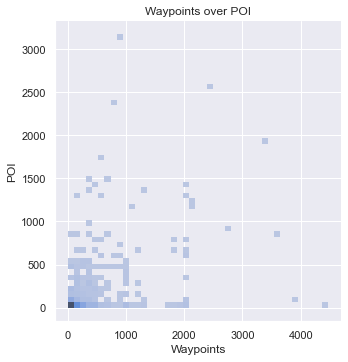

In [36]:
plt.figure()
ax = sns.displot(data=poi_wp_counts, 
                 x="wp_count",
                 y="poi_count", 
                 
                  )

#locs, labels = plt.xticks()
ax.set(title = "Waypoints over POI",
       xlabel = "Waypoints",
       ylabel = "POI")
#plt.setp(labels, rotation=90)

plt.show

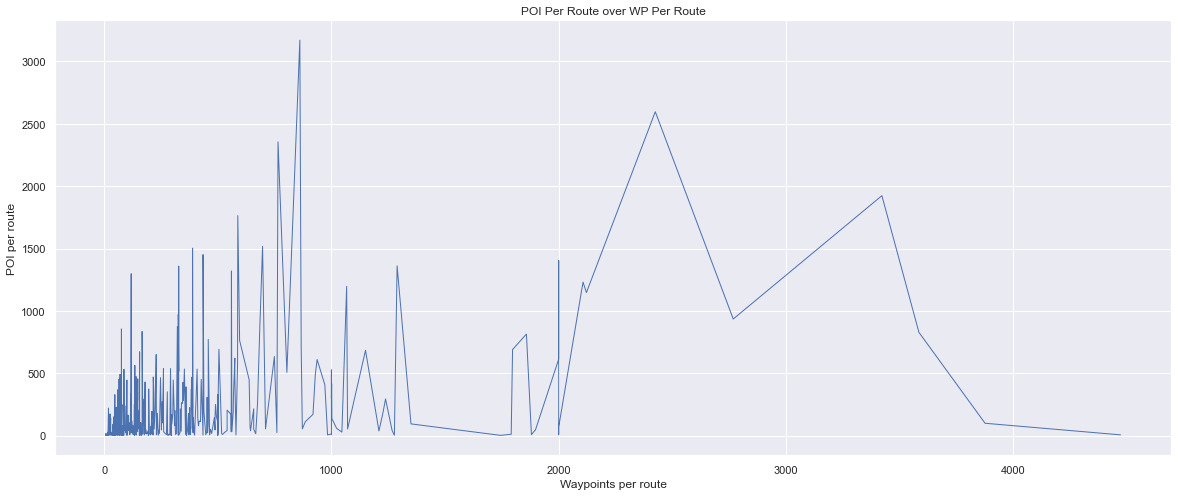

In [163]:
fig, ax = plt.subplots()

ax.plot(poi_wp_counts.wp_count, poi_wp_counts.poi_count, linewidth=1)

ax.set(title= 'POI Per Route over WP Per Route',
       xlabel='Waypoints per route',
       ylabel= 'POI per route',)

fig.set_size_inches(20, 8)
plt.show()

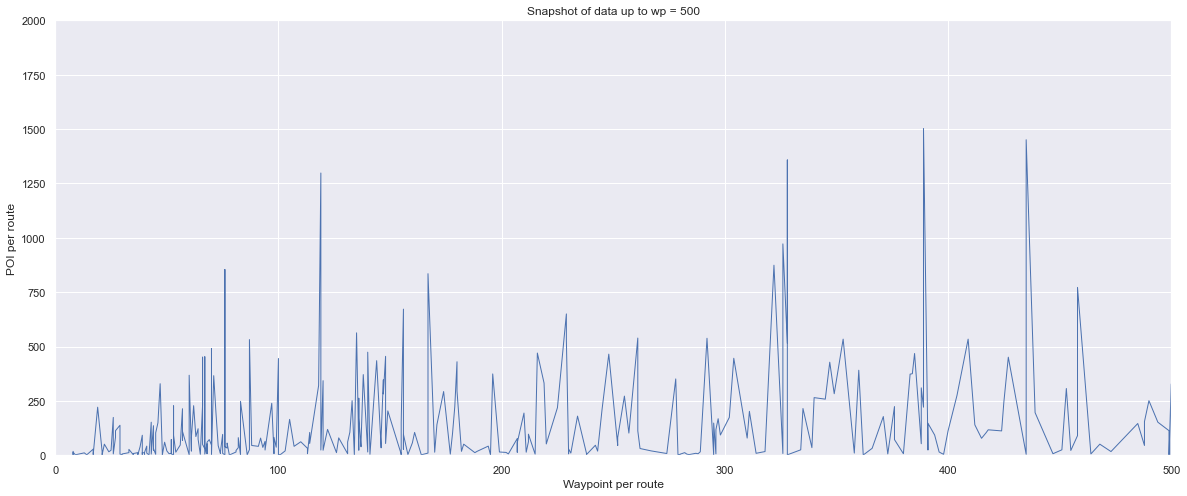

In [158]:
fig, ax = plt.subplots()

ax.plot(poi_wp_counts.wp_count, poi_wp_counts.poi_count, linewidth=1)

ax.set(xlim=(0, 500),
       ylim=(0, 2000),
      xlabel='Waypoint per route',
       ylabel= 'POI per route',
       title= 'Snapshot of data up to wp = 500')

fig.set_size_inches(20, 8)

plt.show()

It seems as if there is no correlation between number of waypoints and number of POI. Perhaps routes with a low poi:wp ratio should be filtered out since these are not 'good' routes? Or should that be left for later.

# Visualising the data without trees or benches

In [164]:
filt = (joint_data['poi_category'] == 'tree') | (joint_data['poi_category'] == 'bench')

no_trees_benches = joint_data.drop(joint_data[filt].index)

no_trees_benches.head(20)

,Unnamed: 0,poi_lat_lgt,waypoint_longitude,route_id,waypoint_latitude,num_of_waypoint,poi_longitude,poi_latitude,poi_name,Unnamed: 0.1,poi_category,route_linestring
0,0,POINT (13.6774745 52.4385208),13.67734,113043,52.43849,133,13.677475,52.438521,Müggeleck,212802,viewpoint,"LINESTRING (13.69072 52.45147, 13.69075 52.451..."
11,11,POINT (13.6254082 52.4471161),13.62483,113043,52.44679,309,13.625408,52.447116,Steak Schmiede,27586,restaurant,"LINESTRING (13.69072 52.45147, 13.69075 52.451..."
12,12,POINT (13.6246356 52.4477609),13.62448,113043,52.44778,318,13.624636,52.447761,Mokkafee,21680,cafe,"LINESTRING (13.69072 52.45147, 13.69075 52.451..."
13,13,POINT (13.6246783 52.4480375),13.62452,113043,52.44795,319,13.624678,52.448037,Kid Creole,26367,restaurant,"LINESTRING (13.69072 52.45147, 13.69075 52.451..."
14,14,POINT (13.6246639 52.4481113),13.62456,113043,52.44819,320,13.624664,52.448111,Heinrichs Kitchen,21905,cafe,"LINESTRING (13.69072 52.45147, 13.69075 52.451..."
15,15,POINT (13.6241801 52.448633),13.62465,113043,52.44860,323,13.624180,52.448633,Müggelschlößchen,25959,restaurant,"LINESTRING (13.69072 52.45147, 13.69075 52.451..."
16,16,POINT (13.6242423 52.4492202),13.62462,113043,52.44924,328,13.624242,52.449220,Kodama,26727,restaurant,"LINESTRING (13.69072 52.45147, 13.69075 52.451..."
17,17,POINT (13.6242468 52.4492921),13.62462,113043,52.44924,328,13.624247,52.449292,Simply Asia,28039,restaurant,"LINESTRING (13.69072 52.45147, 13.69075 52.451..."
18,18,POINT (13.6249254 52.4499521),13.62462,113043,52.44993,331,13.624925,52.449952,Eiscafe Klatsch,23076,cafe,"LINESTRING (13.69072 52.45147, 13.69075 52.451..."
19,19,POINT (13.6249023 52.4500559),13.62462,113043,52.44993,331,13.624902,52.450056,Pane Vino,28079,restaurant,"LINESTRING (13.69072 52.45147, 13.69075 52.451..."


In [20]:
len(no_trees_benches)

7653

In [21]:
poi_per_route2 = no_trees_benches.groupby( ["route_id"] ).size().to_frame(name = 'poi_count').reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 144x144 with 0 Axes>

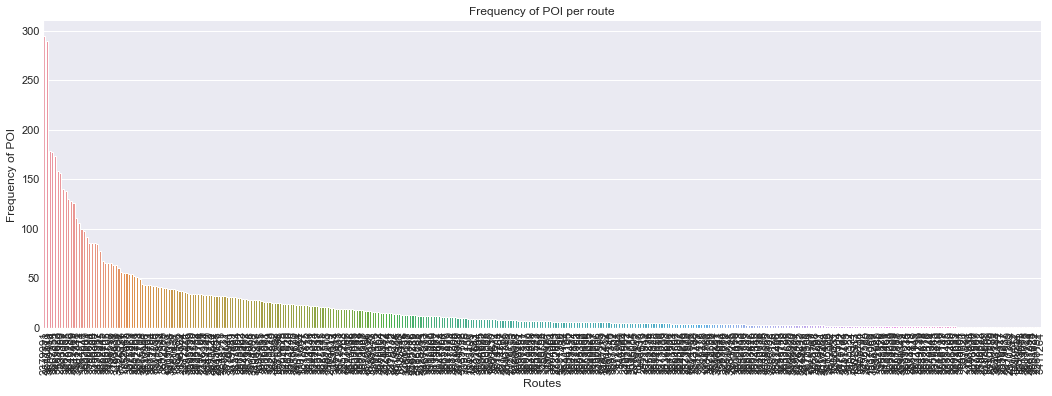

In [125]:
plt.figure()
ax = sns.catplot(data=poi_per_route2, 
                 x="route_id",
                 y="poi_count", 
                 kind="bar",
                 order = poi_per_route2.sort_values(by='poi_count', ascending=False).route_id, 
                 aspect=3)

locs, labels = plt.xticks()
ax.set(title = "Frequency of POI per route",
       xlabel = "Routes",
       ylabel = "Frequency of POI")
plt.setp(labels, rotation=90)

plt.show

Disregarding benches and routes does not make a difference to the shape of POI distribution across routes

In [22]:
category_counts2 = no_trees_benches.groupby( ["poi_category"] ).size().to_frame(name = 'category_count').reset_index()
category_counts2 = category_counts2.sort_values(by='category_count', ascending = False)

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 144x144 with 0 Axes>

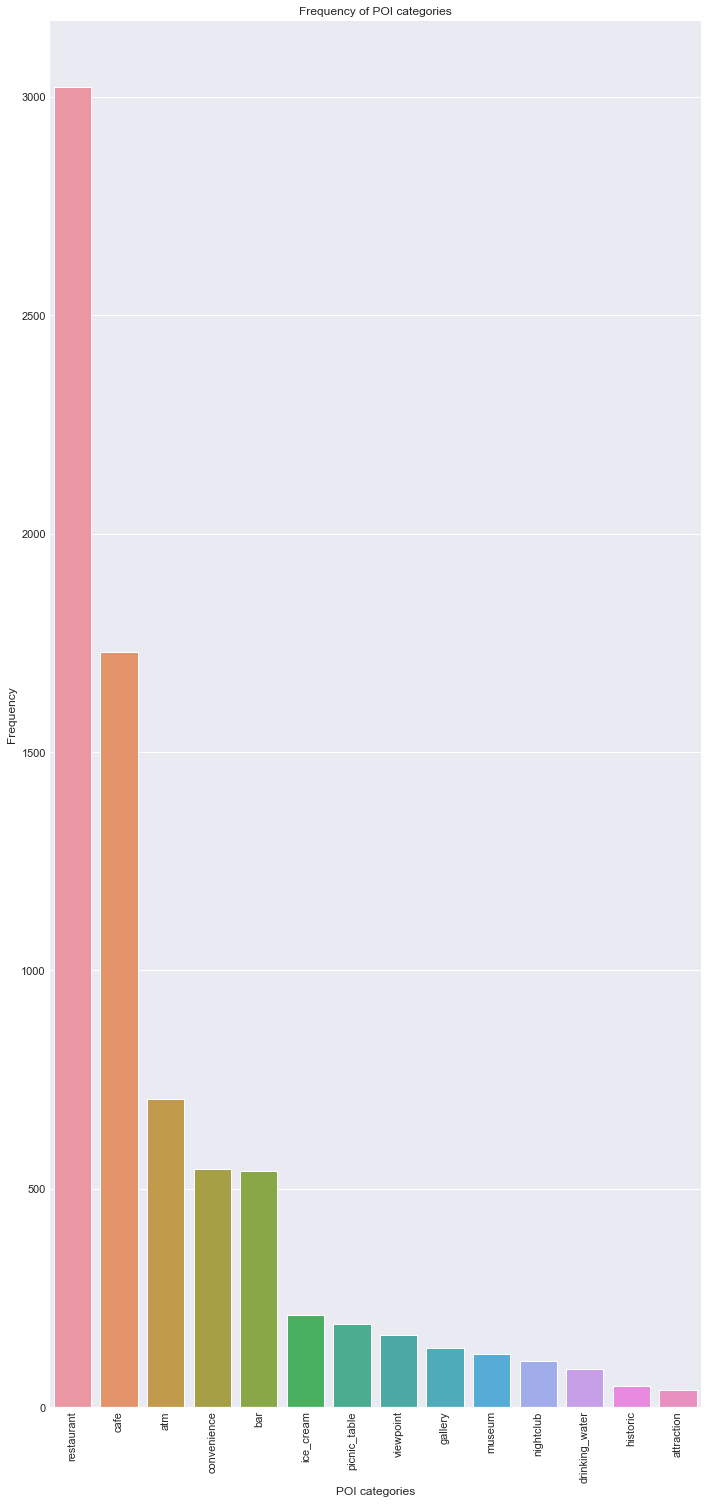

In [127]:
plt.figure()
ax = sns.catplot(data=category_counts2, x="poi_category", y="category_count", kind="bar", height=20, aspect=0.5)
locs, labels = plt.xticks()
ax.set(title = "Frequency of POI categories",
       xlabel = "POI categories",
       ylabel = "Frequency")
plt.setp(labels, rotation=90)

plt.show

### Plotting points of interest per route against waypoints per route 

In [23]:
poi_per_route2_reind = poi_per_route2.set_index('route_id')

In [37]:
poi_wp_counts2 = pd.concat([poi_per_route2_reind, wp_per_route_reind], axis=1, join='inner')
poi_wp_counts2 = poi_wp_counts2.sort_values("wp_count")
poi_wp_counts2

,poi_count,wp_count
route_id,,
3573326,2,9
3573650,6,13
3573291,3,17
1874507,19,19
3460331,2,21
2878119,2,22
3667814,19,25
3536084,5,26
2725063,6,27


In [38]:
len(poi_wp_counts2)

377

In [39]:
poi_wp_counts2.poi_count.describe()

count    377.000000
mean      20.299735
std       35.347708
min        1.000000
25%        3.000000
50%        7.000000
75%       24.000000
max      295.000000
Name: poi_count, dtype: float64

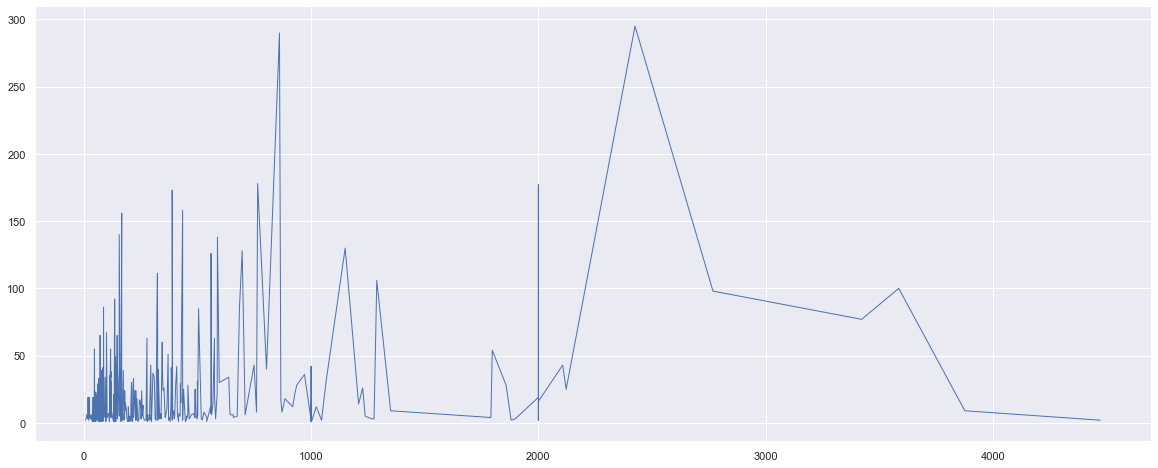

In [40]:
fig, ax = plt.subplots()

ax.plot(poi_wp_counts2.wp_count, poi_wp_counts2.poi_count, linewidth=1)

#ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       #ylim=(0, 8), yticks=np.arange(1, 8))

fig.set_size_inches(20, 8)

plt.show()

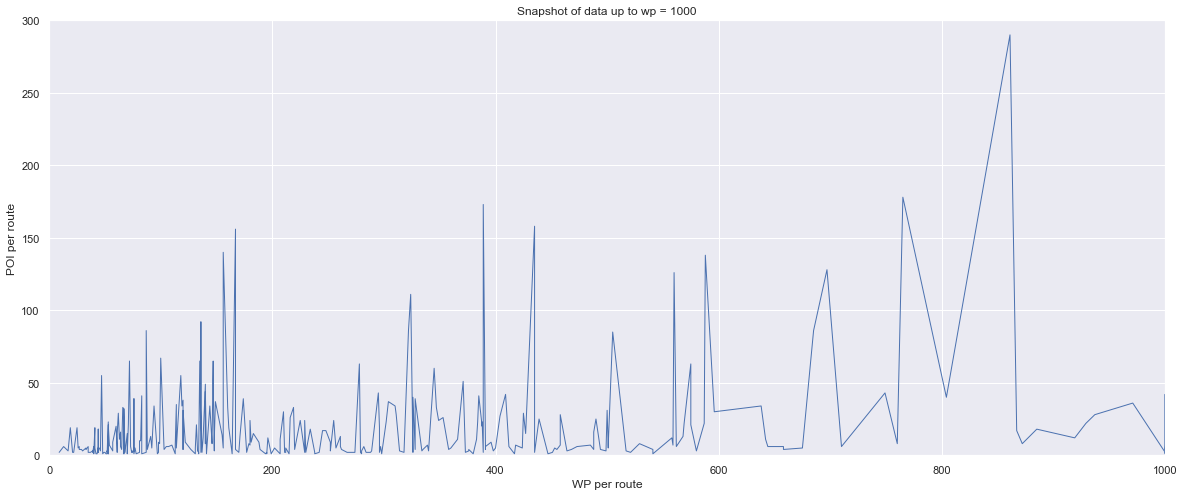

[Text(0.5, 1.0, 'POI Per Route over WP Per Route'),
 Text(0.5, 17.246874999999996, 'Waypoints per route'),
 Text(17.246875000000017, 0.5, 'POI per route')]

In [165]:
fig, ax = plt.subplots()

ax.plot(poi_wp_counts2.wp_count, poi_wp_counts2.poi_count, linewidth=1)

ax.set(xlim=(0, 1000),
       ylim=(0, 300),
       xlabel='WP per route',
       ylabel= 'POI per route',
      title= 'Snapshot of data up to wp = 1000')

fig.set_size_inches(20, 8)

plt.show()

ax.set(title= 'POI Per Route over WP Per Route',
       xlabel='Waypoints per route',
       ylabel= 'POI per route',)

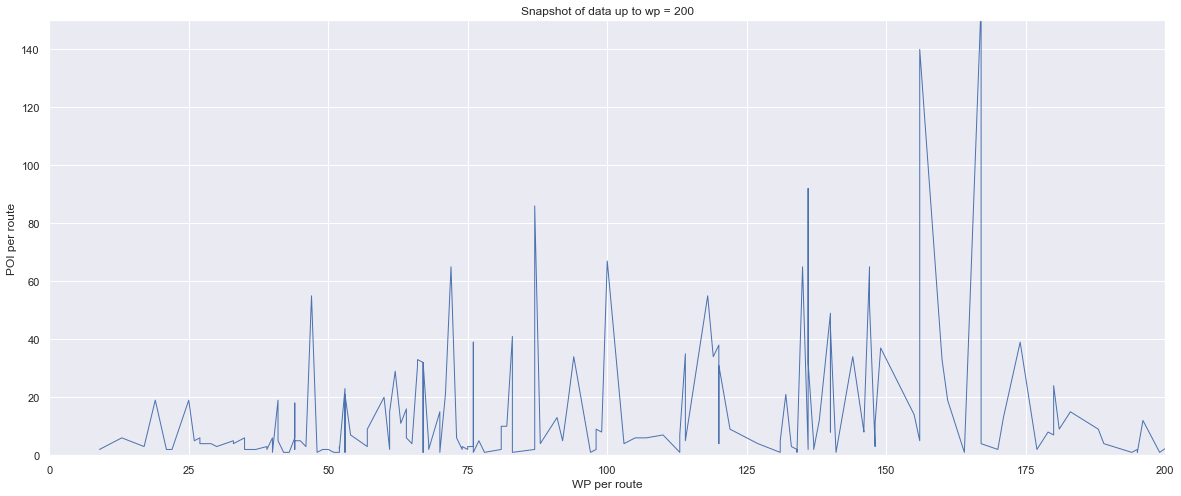

In [166]:
fig, ax = plt.subplots()

ax.plot(poi_wp_counts2.wp_count, poi_wp_counts2.poi_count, linewidth=1)

ax.set(xlim=(0, 200),
       ylim=(0, 150),
       xlabel='WP per route',
       ylabel= 'POI per route',
      title= 'Snapshot of data up to wp = 200')

fig.set_size_inches(20, 8)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

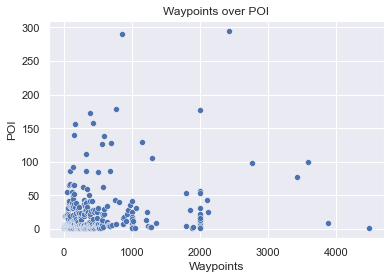

In [41]:
plt.figure()
ax = sns.scatterplot(data=poi_wp_counts2, 
                 x="wp_count",
                 y="poi_count", 
                 
                  )

#locs, labels = plt.xticks()
ax.set(title = "Waypoints over POI",
       xlabel = "Waypoints",
       ylabel = "POI")
#plt.setp(labels, rotation=90)

plt.show

# Finding the number of trees per route

In [68]:
poi_val_cnts = joint_data.groupby( ["route_id"] ).poi_category.value_counts().to_frame()

In [75]:
poi_val_cnts

poi_category
route_id poi_category                
113043   tree                      29
         restaurant                 9
         cafe                       6
         bench                      4
         atm                        2
         bar                        1
         ice_cream                  1
         viewpoint                  1
113104   tree                      52
         bench                      4
         bar                        1
         cafe                       1
         ice_cream                  1
         nightclub                  1
         restaurant                 1
113232   bench                      5
128939   bench                      2
         cafe                       1
148436   bench                    222
         tree                      17
         viewpoint                  3
         cafe                       1
         drinking_water             1
186976   tree                      53
         cafe                       3
         restaurant                 3
         bench                      2
         convenience                1
198322   tree                     166
         restaurant                18
         cafe                       8
         atm                        5
         bar                        4
         bench                      1
         gallery                    1
         ice_cream                  1
198338   tree                     252
         bench                     36
         restaurant                29
         cafe                      13
         atm                        6
         bar                        3
         convenience                3
         museum                     3
         drinking_water             2
         nightclub                  2
         ice_cream                  1
         viewpoint                  1
246822   tree                     201
         restaurant                19
         bar                        7
         bench                      6
         atm                        5
         cafe                       5
         convenience                2
         nightclub                  2
         museum                     1
303905   bench                      5
         tree                       1
322980   tree                      19
         bench                      2
         restaurant                 2
339916   bench                      4
364274   tree                     681
         bench                     47
         restaurant                38
         cafe                      24
         atm                       14
         convenience                9
         bar                        6
         ice_cream                  4
         historic                   2
         museum                     2
         gallery                    1
366776   tree                     126
         bench                      8
         atm                        2
         cafe                       1
         restaurant                 1
546890   tree                      39
         bench                     17
         historic                   2
         restaurant                 2
         bar                        1
599720   bench                      3
         tree                       2
         restaurant                 1
730941   tree                     256
         bench                     41
         restaurant                14
         cafe                       9
         atm                        2
         bar                        2
         museum                     2
         convenience                1
         viewpoint                  1
743868   bench                      1
         tree                       1
758250   tree                     416
         restaurant                34
         bench                     30
         atm                       13
         cafe                      13
         convenience               

In [70]:
poi_val_cnts.columns

Index(['poi_category'], dtype='object')

In [73]:
poi_val_cnts.iloc[0]

poi_category    29
Name: (113043, tree), dtype: int64

In [74]:
poi_val_cnts.shape

(2380, 1)

In [145]:
poi_val_cnts = poi_val_cnts.rename(columns = {'poi_category': 'poi_count'})
poi_val_cnts

poi_count
route_id poi_category             
113043   tree                   29
         restaurant              9
         cafe                    6
         bench                   4
         atm                     2
         bar                     1
         ice_cream               1
         viewpoint               1
113104   tree                   52
         bench                   4
         bar                     1
         cafe                    1
         ice_cream               1
         nightclub               1
         restaurant              1
113232   bench                   5
128939   bench                   2
         cafe                    1
148436   bench                 222
         tree                   17
         viewpoint               3
         cafe                    1
         drinking_water          1
186976   tree                   53
         cafe                    3
         restaurant              3
         bench                   2
         convenience             1
198322   tree                  166
         restaurant             18
         cafe                    8
         atm                     5
         bar                     4
         bench                   1
         gallery                 1
         ice_cream               1
198338   tree                  252
         bench                  36
         restaurant             29
         cafe                   13
         atm                     6
         bar                     3
         convenience             3
         museum                  3
         drinking_water          2
         nightclub               2
         ice_cream               1
         viewpoint               1
246822   tree                  201
         restaurant             19
         bar                     7
         bench                   6
         atm                     5
         cafe                    5
         convenience             2
         nightclub               2
         museum                  1
303905   bench                   5
         tree                    1
322980   tree                   19
         bench                   2
         restaurant              2
339916   bench                   4
364274   tree                  681
         bench                  47
         restaurant             38
         cafe                   24
         atm                    14
         convenience             9
         bar                     6
         ice_cream               4
         historic                2
         museum                  2
         gallery                 1
366776   tree                  126
         bench                   8
         atm                     2
         cafe                    1
         restaurant              1
546890   tree                   39
         bench                  17
         historic                2
         restaurant              2
         bar                     1
599720   bench                   3
         tree                    2
         restaurant              1
730941   tree                  256
         bench                  41
         restaurant             14
         cafe                    9
         atm                     2
         bar                     2
         museum                  2
         convenience             1
         viewpoint               1
743868   bench                   1
         tree                    1
758250   tree                  416
         restaurant             34
         bench                  30
         atm                    13
         cafe                   13
         convenience            13
         ice_cream               6
         bar                     4
         drinking_water          2
         gallery                 1
820021   bench                  16
         tree                    3
         restaurant              2
         cafe                    1
         ice_cream               1


As you can see, we now have a dataframe with **Multiindexing**. Here is the guide for how to work with this: 

https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html

Below, I have used this to get the number of trees per route, **but we could extract the number of every type of category per route in this way**. I think this will be very useful for classification.

In [175]:
# a very useful function for accessing and grouping by the different levels of index !!!

tree_count = poi_val_cnts.xs("tree", level="poi_category") 
tree_count

,poi_count
route_id,
113043,29
113104,52
148436,17
186976,53
198322,166
198338,252
246822,201
303905,1
322980,19


In [176]:
tree_count = tree_count.rename(columns = {'poi_count': 'tree_count'})
tree_count

,tree_count
route_id,
113043,29
113104,52
148436,17
186976,53
198322,166
198338,252
246822,201
303905,1
322980,19


In [177]:
tree_count.sort_values('tree_count', ascending=False, inplace=True)
tree_count

,tree_count
route_id,
3547573,2802
2379991,2203
3670488,1907
3470257,1608
3562051,1511
3619989,1333
3667853,1266
3595999,1258
3640286,1249


In [178]:
tree_count.describe()

,tree_count
count,357.000000
mean,203.725490
std,336.896473
min,1.000000
25%,16.000000
50%,71.000000
75%,252.000000
max,2802.000000


#### Joining tree count and wp count

In [179]:
tree_count = pd.concat([tree_count, wp_per_route_reind], axis=1, join='inner')
tree_count

,tree_count,wp_count
route_id,,
3547573,2802,861
2379991,2203,2425
3670488,1907,765
3470257,1608,3422
3562051,1511,588
3619989,1333,2000
3667853,1266,389
3595999,1258,119
3640286,1249,697


### Creating a 'trees per waypoint' ratio ('greenness value'?) 

In [180]:
tree_count['t/wp'] = (tree_count['tree_count'] / tree_count['wp_count'])
tree_count.sort_values('t/wp', ascending=False, inplace=True)
tree_count

,tree_count,wp_count,t/wp
route_id,,,
3595999,1258,119,10.571429
1005019,782,76,10.289474
1874507,186,19,9.789474
2324442,469,70,6.700000
2844573,416,66,6.303030
2844727,418,67,6.238806
2845688,411,67,6.134328
857465,256,47,5.446809
3536084,140,26,5.384615


In [181]:
tree_count['t/wp'].describe()

count    357.000000
mean       0.882005
std        1.439851
min        0.000224
25%        0.081250
50%        0.368421
75%        1.002445
max       10.571429
Name: t/wp, dtype: float64

### Plotting 'trees per waypoint'

In [132]:
tree_count.sort_values('t/wp', ascending=False).reset_index()

,route_id,tree_count,wp_count,t/wp
0,3595999,1258,119,10.571429
1,1005019,782,76,10.289474
2,1874507,186,19,9.789474
3,2324442,469,70,6.700000
4,2844573,416,66,6.303030
5,2844727,418,67,6.238806
6,2845688,411,67,6.134328
7,857465,256,47,5.446809
8,3536084,140,26,5.384615
9,2408419,314,60,5.233333


<function matplotlib.pyplot.show(close=None, block=None)>

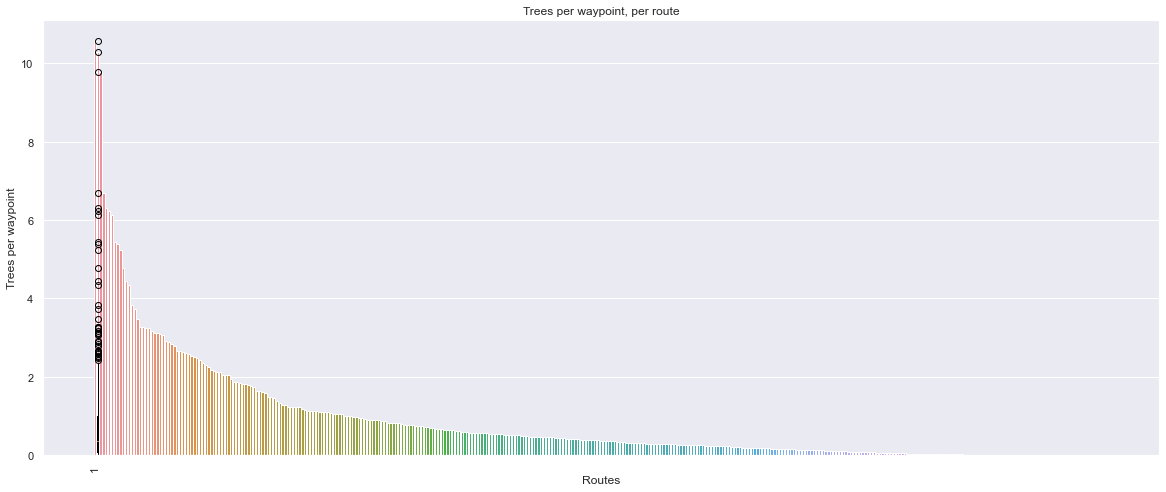

In [140]:
plt.figure(figsize=(20,8))
ax = sns.barplot(data=tree_count.sort_values('t/wp', ascending=False).reset_index(),
                 x="route_id",
                 y="t/wp",
                 order = tree_count.sort_values(by='t/wp', ascending=False).index,   
                 )

locs, labels = plt.xticks()
ax.set(title = "Trees per waypoint, per route",
       xlabel = "Routes",
       ylabel = "Trees per waypoint")
plt.setp(labels, rotation=90)
plt.boxplot(tree_count['t/wp'])
plt.show

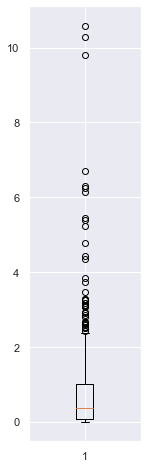

In [143]:
plt.figure(figsize=(2,8))
ax = plt.boxplot(tree_count['t/wp'])
plt.grid(True, axis='y')
plt.show()

My suggestion would be that everything with a tree to waypoint ratio above 2.5-3 could be considered a green route, since these are considered outliers by the boxplot, and we can see on the bar chart that this is where the gradient gets steepest.

## Other Ideas

- display distribution of categories
    - across how many routes is each category spread?
